<a href="https://colab.research.google.com/github/Techbasu/master_solidity/blob/master/MOVIE_UCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the libraries for the project


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt,log

## Read the dataset

In [25]:
df=pd.read_csv('Movie_plot.csv')

## UCB ALGORITHM

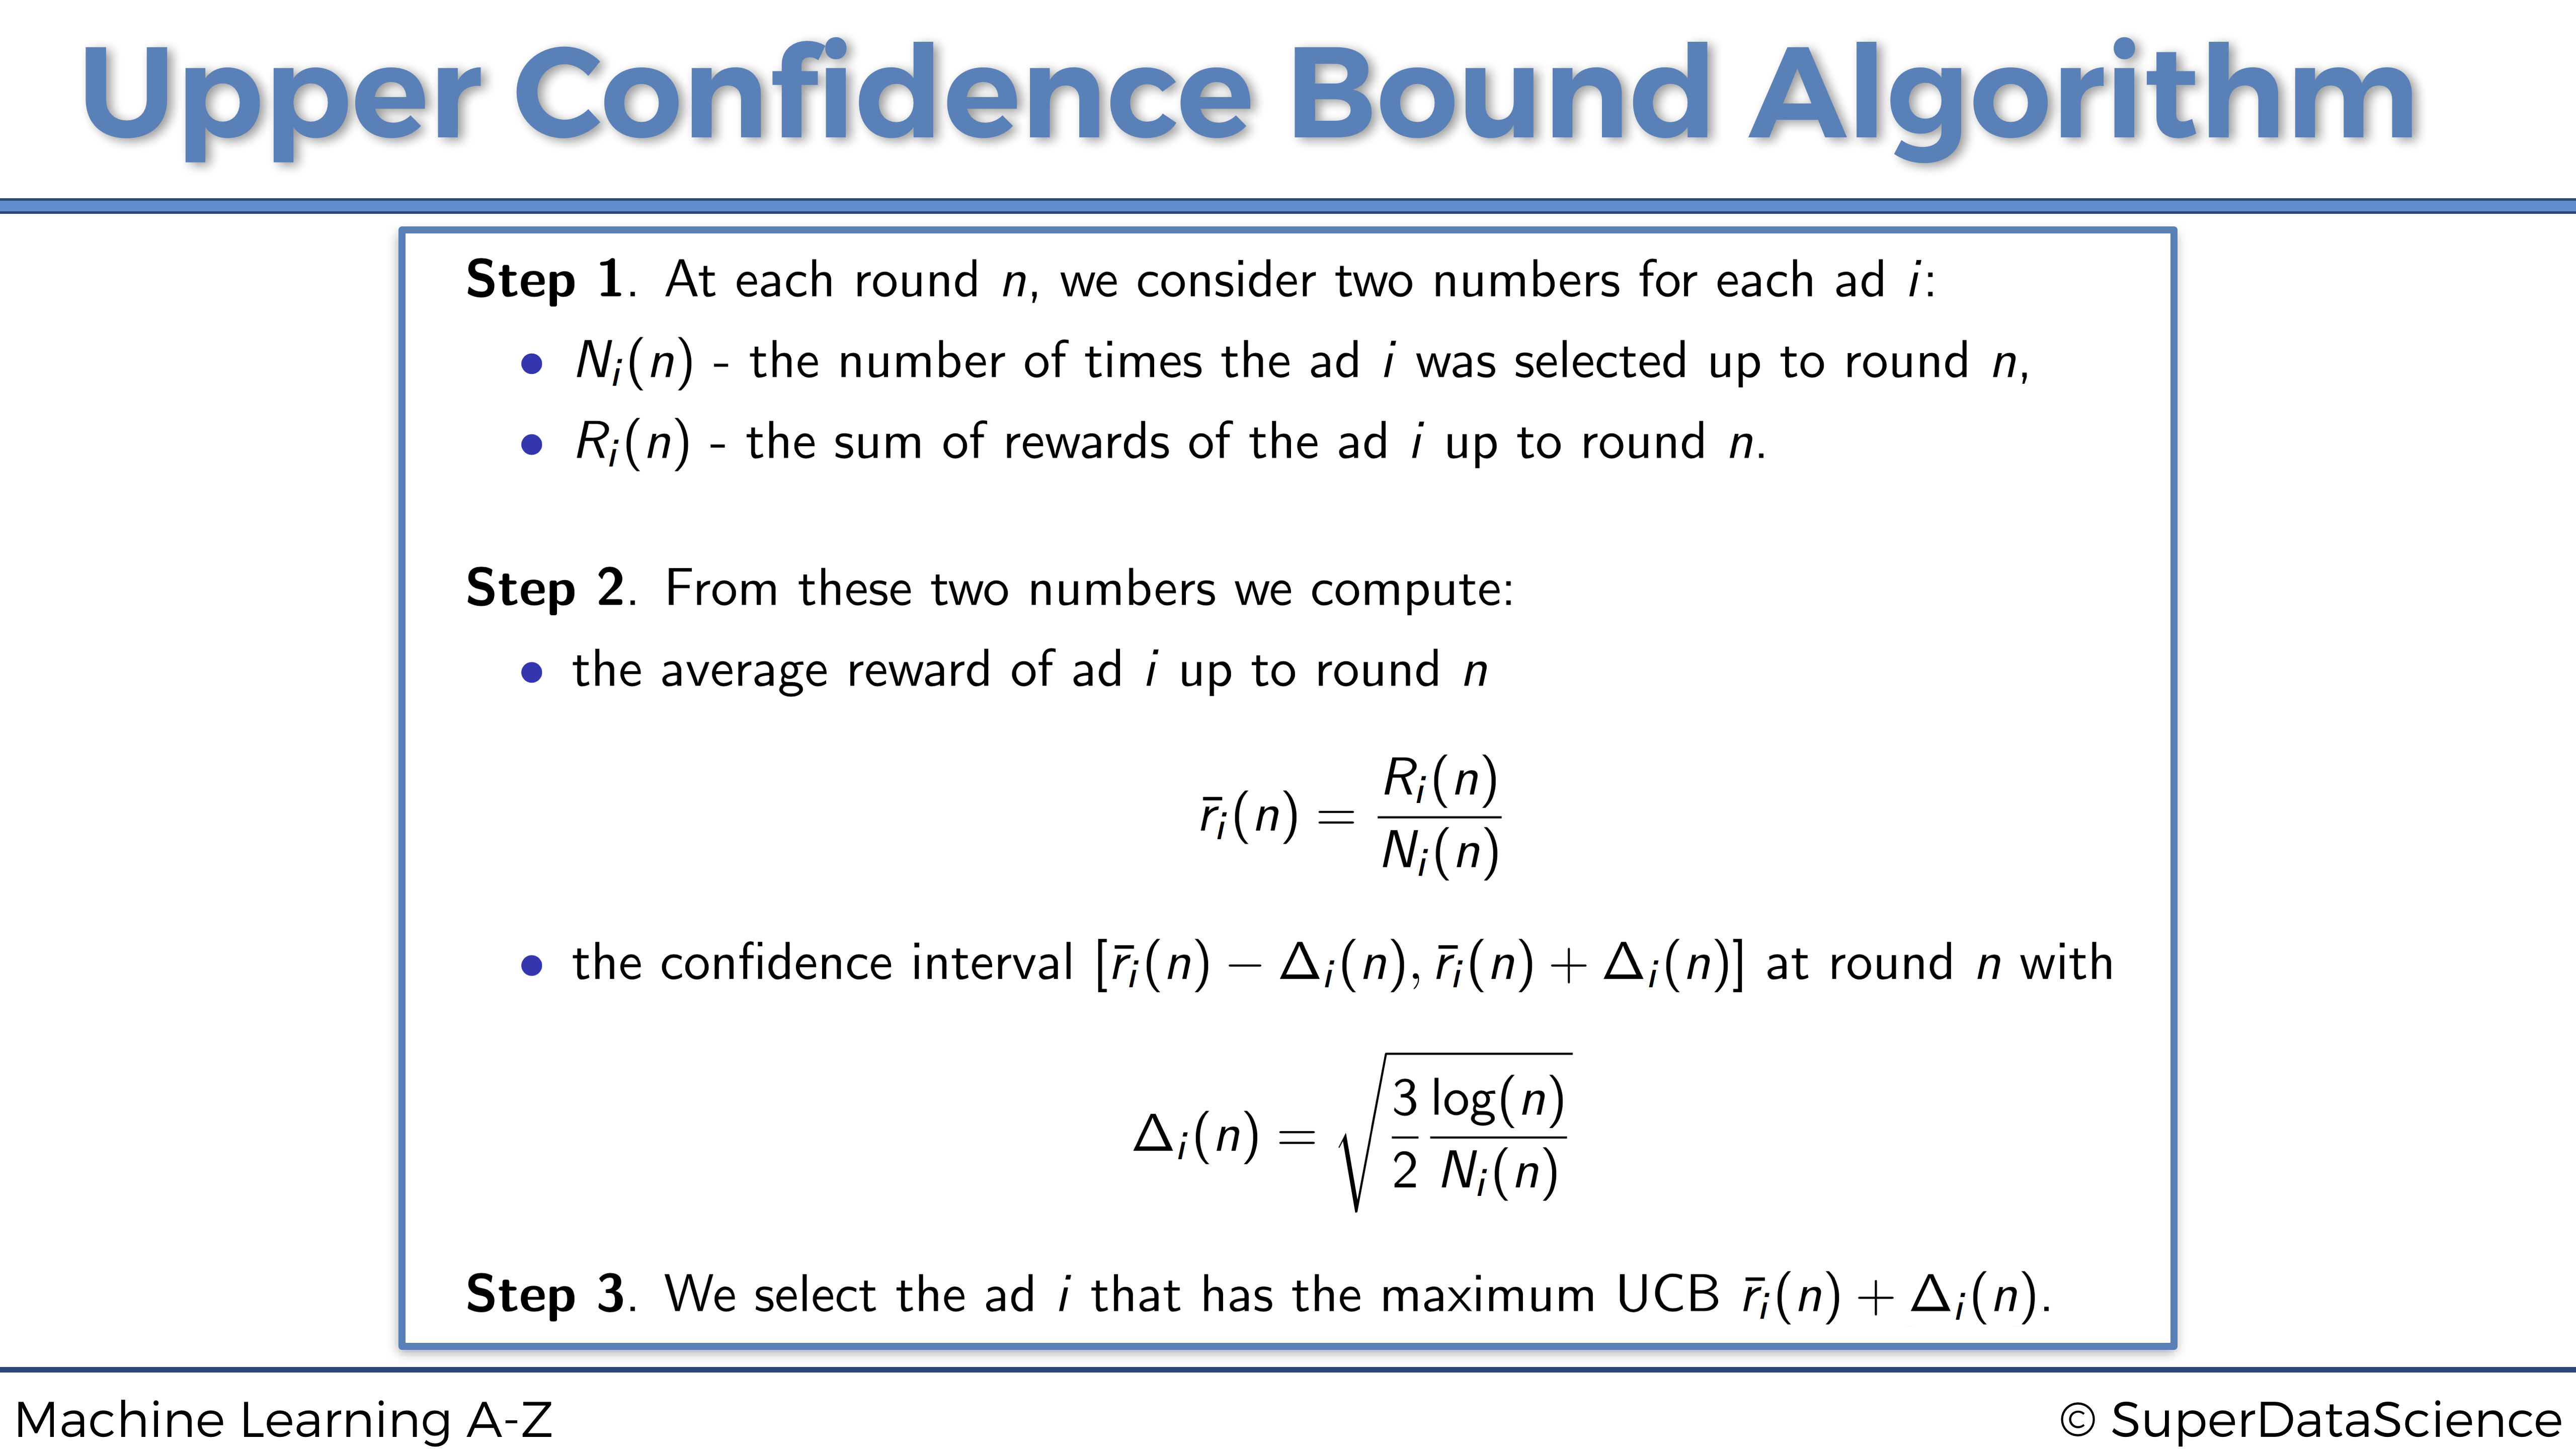

In [32]:
N=20 # number of users in the dataset
d=5 #number of movies
Ni=[0]*d #number of times movies i was selected
Ri=[0]*d #sum of rewards of movie i upto round n
selected_movies=[]#movies selected to the users
total_rewards=0 #sum of all rewards
for rounds in range(N):
  movie=0
  max_upper_bound=0 #whenever we get any cell greater than zero it will be updated
  for movies in range(d):
    if (Ni[movies]>0):
      average_reward= Ri[movies]/Ni[movies]
      delta_i=sqrt(3/2 * log(rounds+1)/Ni[movies])
      upper_bound=  average_reward+delta_i
    else:
      upper_bound=1e400 #placing it to a high value

    if upper_bound> max_upper_bound:
      max_upper_bound=upper_bound
      movie=movies
  selected_movies.append(movie) # including all the movies selected
  Ni[movie]+=1
  reward=df.values[rounds,movie]#reward at each cell i.e 1
  Ri[movie]+=reward ## cumulative reward
  total_rewards+=reward

In [33]:
print(selected_movies)

[0, 1, 2, 3, 4, 0, 1, 2, 4, 4, 4, 3, 0, 1, 2, 1, 2, 4, 1, 2]


In [38]:
print(total_rewards)

9


## Visualization of reward

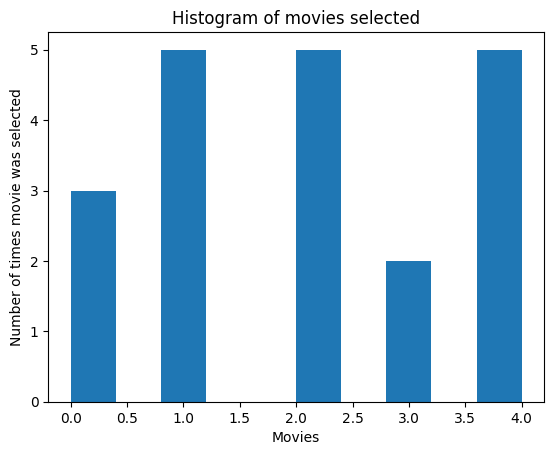

In [37]:
plt.hist(selected_movies)
plt.title('Histogram of movies selected')
plt.xlabel('Movies')
plt.ylabel('Number of times movie was selected')
plt.show()